# Reading files, libraries and information in

In [1]:
import pandas as pd
import glob
import seaborn as sns
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline
matplotlib.rcParams['svg.fonttype'] = 'none'

#### Candidates dataframe
This dataframe has individualized demographic information and either if the candidate was elected or not.

In [2]:
files = glob.glob(r'..\data\consulta_cand_2016\consulta_cand_2016_*.txt')
candidates = pd.concat([pd.read_csv(file, encoding='Latin1', sep=';', header=None,error_bad_lines=False,warn_bad_lines=True) for file in files])
candidates.columns =["DATA_GERACAO","HORA_GERACAO","ANO_ELEICAO","NUM_TURNO","DESCRICAO_ELEICAO","SIGLA_UF","SIGLA_UE","DESCRICAO_UE","CODIGO_CARGO","DESCRICAO_CARGO","NOME_CANDIDATO","SEQUENCIAL_CANDIDATO","NUMERO_CANDIDATO","CPF_CANDIDATO","NOME_URNA_CANDIDATO","COD_SITUACAO_CANDIDATURA","DES_SITUACAO_CANDIDATURA","NUMERO_PARTIDO","SIGLA_PARTIDO","NOME_PARTIDO","CODIGO_LEGENDA","SIGLA_LEGENDA","COMPOSICAO_LEGENDA","NOME_LEGENDA","CODIGO_OCUPACAO","DESCRICAO_OCUPACAO","DATA_NASCIMENTO","NUM_TITULO_ELEITORAL_CANDIDATO","IDADE_DATA_ELEICAO","CODIGO_SEXO","DESCRICAO_SEXO","COD_GRAU_INSTRUCAO","DESCRICAO_GRAU_INSTRUCAO","CODIGO_ESTADO_CIVIL","DESCRICAO_ESTADO_CIVIL","CODIGO_COR_RACA","DESCRICAO_COR_RACA","CODIGO_NACIONALIDADE","DESCRICAO_NACIONALIDADE","SIGLA_UF_NASCIMENTO","CODIGO_MUNICIPIO_NASCIMENTO","NOME_MUNICIPIO_NASCIMENTO","DESPESA_MAX_CAMPANHA","COD_SIT_TOT_TURNO","DESC_SIT_TOT_TURNO","NM_EMAIL",]
candidates = candidates[["SIGLA_UF","SIGLA_UE","CODIGO_CARGO","DESCRICAO_CARGO","SEQUENCIAL_CANDIDATO","NOME_URNA_CANDIDATO","DES_SITUACAO_CANDIDATURA","NUMERO_PARTIDO","SIGLA_PARTIDO","DESCRICAO_OCUPACAO","DATA_NASCIMENTO","CODIGO_SEXO","DESCRICAO_SEXO","DESCRICAO_GRAU_INSTRUCAO","DESCRICAO_COR_RACA","SIGLA_UF_NASCIMENTO","CODIGO_MUNICIPIO_NASCIMENTO","COD_SIT_TOT_TURNO","DESC_SIT_TOT_TURNO","DESPESA_MAX_CAMPANHA","DATA_NASCIMENTO"]]
# I wanna look only at candidates to the city council
candidates = candidates[candidates.DESCRICAO_CARGO=='VEREADOR']
candidates.head(1)

,SIGLA_UF,SIGLA_UE,CODIGO_CARGO,DESCRICAO_CARGO,SEQUENCIAL_CANDIDATO,NOME_URNA_CANDIDATO,DES_SITUACAO_CANDIDATURA,NUMERO_PARTIDO,SIGLA_PARTIDO,DESCRICAO_OCUPACAO,...,CODIGO_SEXO,DESCRICAO_SEXO,DESCRICAO_GRAU_INSTRUCAO,DESCRICAO_COR_RACA,SIGLA_UF_NASCIMENTO,CODIGO_MUNICIPIO_NASCIMENTO,COD_SIT_TOT_TURNO,DESC_SIT_TOT_TURNO,DESPESA_MAX_CAMPANHA,DATA_NASCIMENTO
0,AC,1074,13,VEREADOR,10000000785,REGINALDO RODRIGUES,DEFERIDO,20,PSC,TÉCNICO DE LABORATÓRIO E RAIOS X,...,2,MASCULINO,ENSINO MÉDIO COMPLETO,PARDA,AC,-3,5,SUPLENTE,-1,01/03/1973


#### Nominal votes dataframe
This dataframe has all the nominal votes received by each candidate in every electoral zone of the country.

In [4]:
files = glob.glob(r'..//data/votacao_candidato_munzona_2016\\votacao_candidato_munzona_2016_*.txt')
nominal_votes = pd.concat([pd.read_csv(file, encoding='Latin1', sep=';', header=None,error_bad_lines=False,warn_bad_lines=True) for file in files])
nominal_votes.columns=["DATA_GERACAO","HORA_GERACAO","ANO_ELEICAO","NUM_TURNO","DESCRICAO_ELEICAO","SIGLA_UF","SIGLA_UE","CODIGO_MUNICIPIO","NOME_MUNICIPIO","NUMERO_ZONA","CODIGO_CARGO","NUMERO_CAND","SQ_CANDIDATO","NOME_CANDIDATO","NOME_URNA_CANDIDATO","DESCRICAO_CARGO","COD_SIT_CAND_SUPERIOR","DESC_SIT_CAND_SUPERIOR","CODIGO_SIT_CANDIDATO","DESC_SIT_CANDIDATO","CODIGO_SIT_CAND_TOT","DESC_SIT_CAND_TOT","NUMERO_PARTIDO","SIGLA_PARTIDO","NOME_PARTIDO","SEQUENCIAL_LEGENDA","NOME_COLIGACAO","COMPOSICAO_LEGENDA","TOTAL_VOTOS","TRANSITO",]
nominal_votes = nominal_votes[["SIGLA_UF","SIGLA_UE","CODIGO_MUNICIPIO","NOME_MUNICIPIO","SQ_CANDIDATO","NOME_URNA_CANDIDATO","DESCRICAO_CARGO","SIGLA_PARTIDO","TOTAL_VOTOS"]]
nominal_votes.head(1)

,SIGLA_UF,SIGLA_UE,CODIGO_MUNICIPIO,NOME_MUNICIPIO,SQ_CANDIDATO,NOME_URNA_CANDIDATO,DESCRICAO_CARGO,SIGLA_PARTIDO,TOTAL_VOTOS
0,AC,1007,1007,BUJARI,10000001880,ROMUALDO,PREFEITO,PC do B,1853


#### Votes by party dataframe
This dataframe has all the votes received by a party in every electoral zone of the country.

In [5]:
files = glob.glob(r'..\\data\\votacao_partido_munzona_2016\\votacao_partido_munzona_2016_*.txt')
party_votes = pd.concat([pd.read_csv(file, encoding='Latin1', sep=';', header=None,error_bad_lines=False,warn_bad_lines=True) for file in files])
party_votes.columns=["DATA_GERACAO","HORA_GERACAO","ANO_ELEICAO","NUM_TURNO","DESCRICAO_ELEICAO","SIGLA_UF","SIGLA_UE","CODIGO_MUNICIPIO","NOME_MUNICIPIO","NUMERO_ZONA","CODIGO_CARGO","DESCRICAO_CARGO","TIPO_LEGENDA","NOME_COLIGACAO","COMPOSICAO_LEGENDA","SIGLA_PARTIDO","NUMERO_PARTIDO","NOME_PARTIDO","QTDE_VOTOS_NOMINAIS","QTDE_VOTOS_LEGENDA","TRANSITO","SEQUENCIAL_COLIGACAO",]
party_votes = party_votes[["SIGLA_UF","SIGLA_UE","CODIGO_MUNICIPIO","DESCRICAO_CARGO","TIPO_LEGENDA","NOME_COLIGACAO","COMPOSICAO_LEGENDA","SIGLA_PARTIDO","QTDE_VOTOS_NOMINAIS","QTDE_VOTOS_LEGENDA","SEQUENCIAL_COLIGACAO",]]
party_votes.head(1)

,SIGLA_UF,SIGLA_UE,CODIGO_MUNICIPIO,DESCRICAO_CARGO,TIPO_LEGENDA,NOME_COLIGACAO,COMPOSICAO_LEGENDA,SIGLA_PARTIDO,QTDE_VOTOS_NOMINAIS,QTDE_VOTOS_LEGENDA,SEQUENCIAL_COLIGACAO
0,AC,1457,1457,Vereador,C,FRENTE POPULAR DE SENA MADUREIRA II,PSB / PT / PR / PSL / PRP / PHS / PT do B,PSB,3270.0,164,10000000354


#### Candidate possession dataframe
This dataframe summarizes all the possessions each candidate declared to the electoral justice.

In [6]:
files = glob.glob(r'..\\data\bem_candidato_2016\\bem_candidato_2016_*.txt')
possessions = pd.concat([pd.read_csv(file, encoding='Latin1', sep=';', header=None,error_bad_lines=False,warn_bad_lines=True) for file in files])
possessions.columns=["DATA_GERACAO","HORA_GERACAO","ANO_ELEICAO","DESCRICAO_ELEICAO","SIGLA_UF","SQ_CANDIDATO","CD_TIPO_BEM_CANDIDATO","DS_TIPO_BEM_CANDIDATO","DETALHE_BEM","VALOR_BEM","DATA_ULTIMA_ATUALIZACAO","HORA_ULTIMA_ATUALIZACAO",]
possessions = possessions[["SQ_CANDIDATO","CD_TIPO_BEM_CANDIDATO","DS_TIPO_BEM_CANDIDATO","DETALHE_BEM","VALOR_BEM",]]
possessions.head(1)

,SQ_CANDIDATO,CD_TIPO_BEM_CANDIDATO,DS_TIPO_BEM_CANDIDATO,DETALHE_BEM,VALOR_BEM
0,10000000783,21,"Veículo automotor terrestre: caminhão, automóv...",MOTO CROSSER,7000.0


#### Electorate profile
This dataframe has descriptions of the electorate in each city. Using the dara, I'm able to determine the total number of electors in a given city - something important for further analysis.

In [7]:
# Reading dataframe in and renaming columns
voters = pd.read_csv('..//data/perfil_eleitorado_2016/perfil_eleitorado_2016.txt',encoding='Latin1',sep=';',header=None,error_bad_lines=False,warn_bad_lines=True)
voters.columns=['PERIODO','UF','MUNICIPIO','COD_MUNICIPIO_TSE','NR_ZONA','SEXO','FAIXA_ETARIA','GRAU_DE_ESCOLARIDADE','QTD_ELEITORES_NO_PERFIL',]
# Getting number of voters and saving into the dataframe
voters = voters.groupby(['COD_MUNICIPIO_TSE','MUNICIPIO','UF'])['QTD_ELEITORES_NO_PERFIL'].sum().to_frame().reset_index()

In [8]:
voters.head(1)

,COD_MUNICIPIO_TSE,MUNICIPIO,UF,QTD_ELEITORES_NO_PERFIL
0,19,GUAJARÁ-MIRIM,RO,28042


# 1. Current composition of City Councils

In [9]:
city_councils = {}
city_codes = candidates.SIGLA_UE.unique()
for city_code in city_codes:
    df = candidates[(candidates.SIGLA_UE==city_code)&((candidates.DESC_SIT_TOT_TURNO=='ELEITO POR MÉDIA')|(candidates.DESC_SIT_TOT_TURNO=='ELEITO POR QP'))]
    city_councils[city_code] = df

# 2. Simulating the 'distritão' in each city house


### a) Getting the nominal votes for each candidate

In [10]:
candidates = candidates.merge((nominal_votes.groupby(['SQ_CANDIDATO'])['TOTAL_VOTOS'].sum().to_frame().reset_index()),how='left',left_on='SEQUENCIAL_CANDIDATO',right_on='SQ_CANDIDATO')

### b) Getting the composition of each state if distritão was applied

In [11]:
city_councils_distritao = {}
for city_code in city_codes:
    count = candidates[(candidates.SIGLA_UE==city_code)&((candidates.DESC_SIT_TOT_TURNO=='ELEITO POR QP')|(candidates.DESC_SIT_TOT_TURNO=='ELEITO POR MÉDIA'))]['SEQUENCIAL_CANDIDATO'].count()
    df = candidates[candidates.SIGLA_UE==city_code].sort_values(by='TOTAL_VOTOS',ascending=False).head(count)
    city_councils_distritao[city_code] = df

### c) Uniting all of the city council changes in one dataframe

In [12]:
one_value = []
exceptions = []
all_city_councils = []
for city_code in city_codes:
    df = city_councils_distritao[city_code]['SEQUENCIAL_CANDIDATO'].isin(city_councils[city_code]['SEQUENCIAL_CANDIDATO']).value_counts(normalize=False,dropna=False).to_frame()
    df.columns = [city_code]
    df = df.transpose()
    try:
        df.columns = ['would_stay','would_change']
    except:
        try:
            one_value.append(city_code)
            df['would_change'] = 0 # There should be no 100% change - if there is only a value, then it's because no change would happen
            df.columns = ['would_stay','would_change']
        except: # If another error happens, ignore the city for now and save it into a list
            print('Error in city code', city_code)
            exceptions.append(city_code)
            continue 
    df['total_representatives'] = df['would_stay'] + df['would_change']
    df['would_stay_%'] = df['would_stay']/df['total_representatives']
    df['would_change_%'] = (df['would_change']/df['total_representatives'])*100
    df = df.reset_index()
    df = df.rename(columns={'index':'city_code'})
    all_city_councils.append(df)

Error in city code 35971
Error in city code 9652
Error in city code 8915
Error in city code 8958
Error in city code 8931
Error in city code 77330
Error in city code 79359


In [13]:
# Concatenating all the dataframes
change_city_councils = pd.concat(all_city_councils,ignore_index=True)

In [14]:
# Seven cities were exceptions - probably places where the elections were not validated so far.
exceptions

[35971, 9652, 8915, 8958, 8931, 77330, 79359]

#### d) Adding readable names and number of voters

In [15]:
change_city_councils = change_city_councils.merge(voters,left_on='city_code',right_on='COD_MUNICIPIO_TSE',how='inner')

In [16]:
change_city_councils.sort_values(by='would_change_%',ascending=True)

,city_code,would_stay,would_change,total_representatives,would_stay_%,would_change_%,COD_MUNICIPIO_TSE,MUNICIPIO,UF,QTD_ELEITORES_NO_PERFIL
5560,73474,9,0,9,1.000000,0.000000,73474,CHAPADA DE AREIA,TO,1832
3169,12009,9,0,9,1.000000,0.000000,12009,SÃO JOÃO DA FRONTEIRA,PI,4247
947,94234,9,0,9,1.000000,0.000000,94234,ITAUÇU,GO,7313
3173,10707,9,0,9,1.000000,0.000000,10707,CAPITÃO GERVÁSIO OLIVEIRA,PI,3613
3174,12203,9,0,9,1.000000,0.000000,12203,JÚLIO BORGES,PI,4962
3175,12335,9,0,9,1.000000,0.000000,12335,BELÉM DO PIAUÍ,PI,2961
3177,12599,9,0,9,1.000000,0.000000,12599,PORTO ALEGRE DO PIAUÍ,PI,1788
3178,12300,9,0,9,1.000000,0.000000,12300,RIACHO FRIO,PI,4438
3168,10596,9,0,9,1.000000,0.000000,10596,CRISTALÂNDIA DO PIAUÍ,PI,5658
3181,10960,9,0,9,1.000000,0.000000,10960,NOVA SANTA RITA,PI,3824


In [17]:
# Using pd.cut to assign each city to a bin according to the number of voters
change_city_councils['voters_bins'] = pd.cut(change_city_councils.QTD_ELEITORES_NO_PERFIL,
         bins=[0,10000,50000,100000,300000,500000,1000000,change_city_councils.QTD_ELEITORES_NO_PERFIL.max()],
         labels=['Até 10.000',
                 '10.000 - 50.000',
                '50.000 - 100.000',
                '100.000 - 300.000',
                '300.000 - 500.000',
                '500.000 - 1.000.000',
                'Acima de 1.000.000'])

In [18]:
# Using pd.cut to assign each city to a bin according to the percentage change
# Cities with 0% change became NaNs when categorizing the percentage bins. 
change_city_councils['percentage_change'] = pd.cut(change_city_councils['would_change_%'],
         bins=[0,10,20,30,40,change_city_councils['would_change_%'].max()],
         labels=['Até 10%',
                 '10% - 20%',
                '20% - 30%',
                '30% - 40%',
                'Acima de 40%'])

In [19]:
change_city_councils.sort_values(by='would_change_%',ascending=True)

,city_code,would_stay,would_change,total_representatives,would_stay_%,would_change_%,COD_MUNICIPIO_TSE,MUNICIPIO,UF,QTD_ELEITORES_NO_PERFIL,voters_bins,percentage_change
5560,73474,9,0,9,1.000000,0.000000,73474,CHAPADA DE AREIA,TO,1832,Até 10.000,NaN
3169,12009,9,0,9,1.000000,0.000000,12009,SÃO JOÃO DA FRONTEIRA,PI,4247,Até 10.000,NaN
947,94234,9,0,9,1.000000,0.000000,94234,ITAUÇU,GO,7313,Até 10.000,NaN
3173,10707,9,0,9,1.000000,0.000000,10707,CAPITÃO GERVÁSIO OLIVEIRA,PI,3613,Até 10.000,NaN
3174,12203,9,0,9,1.000000,0.000000,12203,JÚLIO BORGES,PI,4962,Até 10.000,NaN
3175,12335,9,0,9,1.000000,0.000000,12335,BELÉM DO PIAUÍ,PI,2961,Até 10.000,NaN
3177,12599,9,0,9,1.000000,0.000000,12599,PORTO ALEGRE DO PIAUÍ,PI,1788,Até 10.000,NaN
3178,12300,9,0,9,1.000000,0.000000,12300,RIACHO FRIO,PI,4438,Até 10.000,NaN
3168,10596,9,0,9,1.000000,0.000000,10596,CRISTALÂNDIA DO PIAUÍ,PI,5658,Até 10.000,NaN
3181,10960,9,0,9,1.000000,0.000000,10960,NOVA SANTA RITA,PI,3824,Até 10.000,NaN


# 3. Plotting

In [20]:
# Creating a second dataframe with the mean for each bin
change_city_councils_means = change_city_councils.groupby('voters_bins').mean().reset_index()

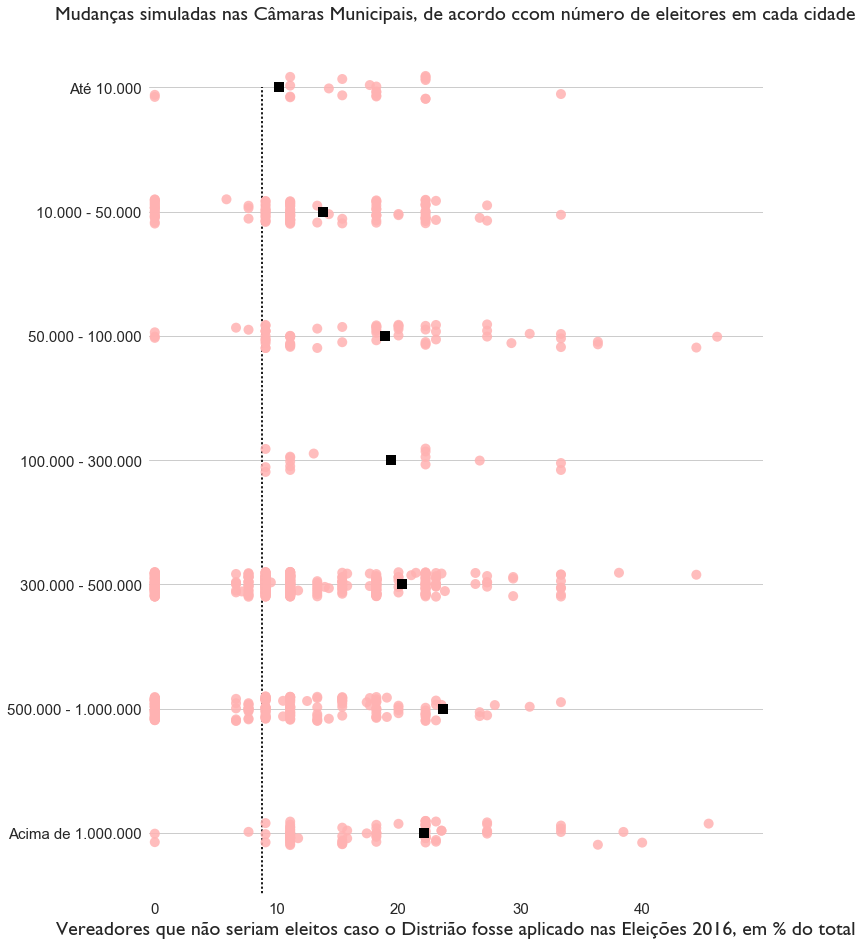

In [21]:
sns.set_style("whitegrid")
fig, ax = plt.subplots(figsize=(11,16))
sns.stripplot(data=change_city_councils,
                   y='UF',
                   x='would_change_%',
                   color='#ffb2b2',
                   size=10,
                   alpha=0.85,
                   jitter=True)

sns.stripplot(data=change_city_councils_means,
                   y='voters_bins',
                   x='would_change_%',
                   color='black',
                   size=10,
                   jitter=False,
                   marker='s')


# Plotting a line with the simulated changes in National Congress
x1 = 8.7719 # Percentage of change in National Congress
y1 = 26 # Ending position, in the top of the chart - arbitrary, since Y values are categorical, not numerical
x2 = 8.7719
y2 = 0 # Starting position, in the bottom of the chart - arbitrary, since Y values are categorical, not numerical
plt.plot([x1,x2],[y1,y2],color='black',linestyle=':') # Plotting the line I've just set


# Setting a custom font for the labels
custom_font = {'fontname':'Gill Sans MT','size':'20'}

ax.tick_params(labelsize=15)
ax.set_xlim(-0.5)
ax.set_ylabel('',**custom_font)
ax.set_xlabel('Vereadores que não seriam eleitos caso o Distrião fosse aplicado nas Eleições 2016, em % do total',**custom_font)
ax.set_title("Mudanças simuladas nas Câmaras Municipais, de acordo ccom número de eleitores em cada cidade",**custom_font)
ax.yaxis.grid(True)
ax.xaxis.grid(False)
sns.despine(left=True,bottom=True)

#plt.savefig(r'..\visuals\cities_change.png',transparent=True)

# 4. Cleaning and saving to .csv with portuguese names

In [22]:
capitals = ["Rio Branco",
"Maceió",
"Macapá",
"Manaus",
"Salvador",
"Fortaleza",
"Brasília",
"Vitória",
"Goiânia",
"São Luís",
"Cuiabá",
"Campo Grande",
"Belo Horizonte",
"Belém",
"João Pessoa",
"Curitiba",
"Recife",
"Teresina",
"Rio de Janeiro",
"Natal",
"Porto Alegre",
"Porto Velho",
"Boa Vista",
"Florianópolis",
"São Paulo",
"Aracaju",
"Palmas",]

In [23]:
change_city_councils.columns = ['código_TSE','vereadores_ficariam','vereadores_mudariam','total_vereadores','vereadores_ficariam_%','vereadores_mudariam_%','COD_MUNICIPIO_TSE','cidade','UF','total_eleitores','voters_bins','grupos_%']

In [24]:
change_city_councils =  change_city_councils[['código_TSE','cidade','UF','vereadores_mudariam_%','grupos_%']]

In [32]:
(change_city_councils['vereadores_mudariam_%'] > 8.7).value_counts(normalize=True)

True     0.757058
False    0.242942
Name: vereadores_mudariam_%, dtype: float64

In [33]:
(change_city_councils['vereadores_mudariam_%'] > 8.7).value_counts(normalize=False)

True     4210
False    1351
Name: vereadores_mudariam_%, dtype: int64

In [29]:
change_city_councils['grupos_%'].value_counts(dropna=False)

10% - 20%       2543
NaN             1181
20% - 30%       1042
Até 10%          615
30% - 40%        171
Acima de 40%       9
Name: grupos_%, dtype: int64

In [ ]:
change_city_councils.head()

In [31]:
top_20_change = change_city_councils.sort_values(by='vereadores_mudariam_%',ascending=False).head(20)
top_20_change
#top_20_change.to_csv('20-cidades-maior-mudanca.csv',index=False)

,código_TSE,cidade,UF,vereadores_mudariam_%,grupos_%
3586,58696,NOVA IGUAÇU,RJ,47.058824,Acima de 40%
178,2232,CAREIRO,AM,46.153846,Acima de 40%
818,57150,PEDRO CANÁRIO,ES,45.454545,Acima de 40%
3598,58149,JAPERI,RJ,45.454545,Acima de 40%
311,36234,ITAPARICA,BA,44.444444,Acima de 40%
5343,63495,CORDEIRÓPOLIS,SP,44.444444,Acima de 40%
2350,91898,JUSCIMEIRA,MT,44.444444,Acima de 40%
3906,3123,PACARAIMA,RR,44.444444,Acima de 40%
150,2976,BOA VISTA DO RAMOS,AM,44.444444,Acima de 40%
2432,5975,DOM ELISEU,PA,40.000000,30% - 40%


In [ ]:
#change_by_percentage_group = change_city_councils.groupby('grupos_%')['cidade'].count().reset_index()
#change_by_percentage_group.to_csv('cidades-agrupadas-por-percentual.csv',index=False)

In [ ]:
#capital_change = change_city_councils[change_city_councils['cidade'].isin(capital.upper() for capital in capitals)].sort_values(by='vereadores_mudariam_%',ascending=False)
#capital_change.to_csv('mudanca-capitais.csv',index=False)